# Prise en main des concepts du Deep Learning

<br/>

##### Arnaud Deleruyelle : Doctorant SIGMA - BioComputing
##### Encadrement: John Klein (SIGMA) - Cristian Versari (BioComputing)

## Partie 1 : Initialisation du code

Nous allons traiter ce travail à l'aide de la bibliothèque Tensorflow de Google. 
Cette partie va se consacrer à la gestion des imports, la création des données etc...

### Section 1.1: Imports

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from math import sin

### Section 1.2: Création d'un dataset artificiel

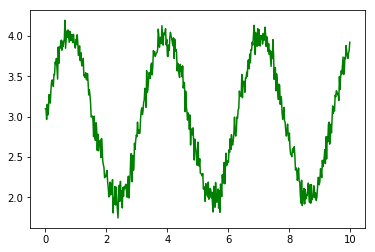

In [73]:
# dataset

def f(x): return sin(2*x) + 3
x_vals = np.arange(0, 10, 0.02)
y_vals = np.array([f(x) + np.random.normal(0, 0.1) for x in x_vals])

nb_data = int(10 / 0.02)

plt.plot(x_vals,y_vals, 'green')
plt.show()


### Section 1.3: Variables Globales

In [3]:
epochs = 20000
batch_size = 100

x = tf.placeholder(shape=[None, 1], dtype=tf.float64, name='x')
y = tf.placeholder(shape=[None, 1], dtype=tf.float64, name='y')

### Section 1.4: Fit

In [4]:
def Fit(x_vals,y_vals,model):
    sess = tf.Session()
    init_vars = tf.variables_initializer(tf.global_variables())
    sess.run(init_vars)
    for epoch in range(epochs):
        indices = np.random.choice(x_vals.shape[0], size=batch_size)
        x_batch = x_vals[indices].reshape((-1,1))
        x_batch = np.hstack([x_batch])
        y_batch = y_vals[indices].reshape((-1,1))
        feed_dict = {x: x_batch, y: y_batch}
        sess.run(model, feed_dict=feed_dict)
        if epoch%200==0:
            print("Loss = ", sess.run(avg_llh, feed_dict=feed_dict))
    return sess

### Section 1.5: Predict

In [5]:
def Predict(x_vals,session):
    x_batch = np.hstack([x_vals.reshape((-1,1))])
    feed_dict = {x: x_batch}
    yh_vals = session.run((y_pred), feed_dict=feed_dict)
    return yh_vals

    

### Section 1.6: Test d'un modèle

In [6]:
# first layer
A1 = tf.Variable(np.random.rand(1,8), dtype=tf.float64)
b1 = tf.Variable(np.random.rand(8), dtype=tf.float64)
l1_out = tf.tanh(tf.matmul(x, A1) + b1)

# second layer
A2 = tf.Variable(np.random.rand(8,8), dtype=tf.float64)
b2 = tf.Variable(np.random.rand(8), dtype=tf.float64)
l2_out = tf.tanh(tf.matmul(l1_out, A2) + b2)

# third layer
A3 = tf.Variable(np.random.rand(8,1), dtype=tf.float64)
b3 = tf.Variable(np.random.rand(1), dtype=tf.float64)
l3_out = tf.matmul(l2_out, A3) + b3

# output layer
y_pred = l3_out

# loss function
loglikelihoods = tf.square(y_pred - y)
avg_llh = tf.reduce_mean(loglikelihoods)

# optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.01)
model = opt.minimize(avg_llh)

In [7]:
# fit the model
modelFit = Fit(x_vals,y_vals,model)

Loss =  1.8559035258627898
Loss =  0.47112271082286794
Loss =  0.4047462197543082
Loss =  0.38350913552948684
Loss =  0.34313562977632656
Loss =  0.33433020226583665
Loss =  0.29860667410082864
Loss =  0.32248436460928476
Loss =  0.2677502574282557
Loss =  0.22177047489990137
Loss =  0.2161228102395514
Loss =  0.16579405475593628
Loss =  0.26077795983749014
Loss =  0.20261604915444983
Loss =  0.1545753298845048
Loss =  0.19255848373052417
Loss =  0.10632144746413187
Loss =  0.1316800962293529
Loss =  0.1531859200917768
Loss =  0.07490313169848616
Loss =  0.06852151301348469
Loss =  0.06610863799795816
Loss =  0.09714009692098989
Loss =  0.07129546963086589
Loss =  0.0773193177446893
Loss =  0.10254833249435634
Loss =  0.1271957919309251
Loss =  0.11633049636641526
Loss =  0.053522250426822786
Loss =  0.0883069125171763
Loss =  0.06212291567177921
Loss =  0.07774560796553201
Loss =  0.02936727231420438
Loss =  0.017488513109556555
Loss =  0.013875791451432114
Loss =  0.01131184554430067

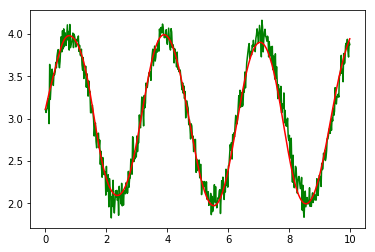

In [8]:
# predict 
modelPredict = Predict(x_vals,modelFit)

plt.plot(x_vals,y_vals, 'green')
plt.plot(x_vals,modelPredict, 'red')
plt.show()

## Partie 2: Utilisation des différentes fonctions d'activation.

Dans cette partie, nous allons étudier les 4 fonctions d'activation (Relu, sigmoide, tanh, identité).
Pour ce faire, nous avons choisi un optimiseur (Adam) de manière à ne changer que la couche d'activation.

### Section 2.1: fonction de test

In [53]:
# mse

def mse(y_pred,y):
    return np.mean(np.square(y_pred - y))

npArray1 = np.array([1,2,4])
npArray2 = np.array([1,3,7])

print("mse = " + str(mse(npArray1,npArray2)))

# mae

def mae(y_pred,y):
    return np.mean(np.abs(y_pred - y))

print("mae = " + str(mae(npArray1,npArray2)))

mse = 3.3333333333333335
mae = 1.3333333333333333


In [75]:
# test with mean of n launch

def testFunctionActivation(n, x_vals, y_vals, model):
    liste_result = []
    for i in range(n):
        session = Fit(x_vals, y_vals, model)
        y_result = Predict(x_vals,session)
        liste_result.append(y_result)
        session.close()
    result = np.mean(liste_result, axis = 0)
    return result.reshape(nb_data,)
        

### Section 2.2: Relu

In [76]:
# model with Relu

# first layer
A1 = tf.Variable(np.random.rand(1,8), dtype=tf.float64)
b1 = tf.Variable(np.random.rand(8), dtype=tf.float64)
l1_out = tf.nn.relu(tf.matmul(x, A1) + b1)

# second layer
A2 = tf.Variable(np.random.rand(8,8), dtype=tf.float64)
b2 = tf.Variable(np.random.rand(8), dtype=tf.float64)
l2_out = tf.nn.relu(tf.matmul(l1_out, A2) + b2)

# third layer
A3 = tf.Variable(np.random.rand(8,1), dtype=tf.float64)
b3 = tf.Variable(np.random.rand(1), dtype=tf.float64)
l3_out = tf.matmul(l2_out, A3) + b3

# output layer
y_pred = l3_out

# loss function
loglikelihoods = tf.square(y_pred - y)
avg_llh = tf.reduce_mean(loglikelihoods)

# optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.01)
modelRelu = opt.minimize(avg_llh)

In [77]:
# train model
resRelu = testFunctionActivation(10,x_vals,y_vals,modelRelu)

Loss =  2605.6337542559045
Loss =  1.2211344331964715
Loss =  1.1603547083747927
Loss =  0.641014114718836
Loss =  0.6331833015096912
Loss =  0.5240805183876903
Loss =  0.4443337040730114
Loss =  0.4230929761396402
Loss =  0.4465604250764569
Loss =  0.4037879571029937
Loss =  0.4337905769265556
Loss =  0.484288780607139
Loss =  0.47772315415884015
Loss =  0.4125538580989113
Loss =  0.38448427453001216
Loss =  0.4976400838708184
Loss =  0.457480581654461
Loss =  0.3888402257105729
Loss =  0.41960597408565087
Loss =  0.4278375650161206
Loss =  0.4118653440076059
Loss =  0.47934211507511265
Loss =  0.4053028425102933
Loss =  0.38462973616660306
Loss =  0.36738619994429306
Loss =  0.42804742103554644
Loss =  0.4405323517238338
Loss =  0.4368532069776738
Loss =  0.3889621970636473
Loss =  0.38638881200170055
Loss =  0.40546294015453144
Loss =  0.3758757100619299
Loss =  0.35020983312103193
Loss =  0.35894996059540113
Loss =  0.3736725398309315
Loss =  0.4670051965828958
Loss =  0.4183716150

Loss =  1.076331431047162
Loss =  0.8000324074880634
Loss =  0.5948990905981282
Loss =  0.459898093745094
Loss =  0.37819143123906385
Loss =  0.43024546794987084
Loss =  0.43951215902361696
Loss =  0.46502205850226935
Loss =  0.46029414657207113
Loss =  0.3647958114077895
Loss =  0.45803944457101764
Loss =  0.5050699505787076
Loss =  0.392317331796993
Loss =  0.47737892786684866
Loss =  0.4370353057588277
Loss =  0.3816549583126539
Loss =  0.4193955979538863
Loss =  0.44127926000651974
Loss =  0.3948067514616697
Loss =  0.46676281508951417
Loss =  0.47785932207184734
Loss =  0.45749968744091773
Loss =  0.4303579714294351
Loss =  0.3950197349147693
Loss =  0.5564288416482602
Loss =  0.3873635810782835
Loss =  0.40671349416662705
Loss =  0.4353340188560705
Loss =  0.4686774622261294
Loss =  0.3713754431978495
Loss =  0.4236741395845974
Loss =  0.34070948658825395
Loss =  0.3970978810746907
Loss =  0.407305382983928
Loss =  0.4734185761198015
Loss =  0.3668110965860766
Loss =  0.365479680

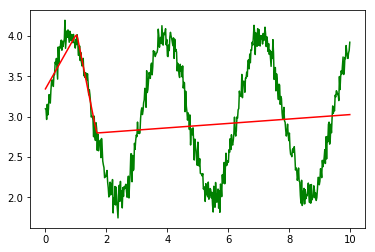

mae = 0.5363057953578985
mse = 0.4126734322137709


In [78]:
# print result

plt.plot(x_vals,y_vals, 'green')
plt.plot(x_vals,resRelu, 'red')
plt.show()

print( "mae = " + str(mae(resRelu,y_vals)))
print( "mse = " + str(mse(resRelu,y_vals)))

### Section 2.3: Sigmoide

In [79]:
# model with sigmoid

# first layer
A1 = tf.Variable(np.random.rand(1,8), dtype=tf.float64)
b1 = tf.Variable(np.random.rand(8), dtype=tf.float64)
l1_out = tf.nn.sigmoid(tf.matmul(x, A1) + b1)

# second layer
A2 = tf.Variable(np.random.rand(8,8), dtype=tf.float64)
b2 = tf.Variable(np.random.rand(8), dtype=tf.float64)
l2_out = tf.nn.sigmoid(tf.matmul(l1_out, A2) + b2)

# third layer
A3 = tf.Variable(np.random.rand(8,1), dtype=tf.float64)
b3 = tf.Variable(np.random.rand(1), dtype=tf.float64)
l3_out = tf.matmul(l2_out, A3) + b3

# output layer
y_pred = l3_out

# loss function
loglikelihoods = tf.square(y_pred - y)
avg_llh = tf.reduce_mean(loglikelihoods)

# optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.01)
modelSigmoid = opt.minimize(avg_llh)

In [80]:
# train model
resSigmoid = testFunctionActivation(10,x_vals,y_vals,modelSigmoid)

Loss =  9.191100401147569
Loss =  0.5201763445837128
Loss =  0.4910932107982014
Loss =  0.4726392189523182
Loss =  0.4163024350666453
Loss =  0.4396984705899878
Loss =  0.43983195468408426
Loss =  0.41177454119806756
Loss =  0.35618837422403543
Loss =  0.41845802798729714
Loss =  0.3242525425624025
Loss =  0.3693955187732726
Loss =  0.3427071101179811
Loss =  0.30620977274469996
Loss =  0.34826976664528936
Loss =  0.26127160191291204
Loss =  0.28043358020356074
Loss =  0.3123755754801036
Loss =  0.29719540431926766
Loss =  0.36145197211471397
Loss =  0.262855530924944
Loss =  0.29688056578176747
Loss =  0.3031276266322543
Loss =  0.28531193388557136
Loss =  0.23245561247262686
Loss =  0.310601588976334
Loss =  0.32567745671775755
Loss =  0.2650566389779719
Loss =  0.3011131829258399
Loss =  0.22500357891023326
Loss =  0.19847397871809647
Loss =  0.2297136566497479
Loss =  0.2077422354136872
Loss =  0.21657561748100268
Loss =  0.18820486987016
Loss =  0.20076590423939195
Loss =  0.16062

Loss =  9.168881788545454
Loss =  0.4593765867700836
Loss =  0.5015281175398868
Loss =  0.4687678130952218
Loss =  0.468736865641947
Loss =  0.41546363131785014
Loss =  0.3959282052633873
Loss =  0.38204361850938284
Loss =  0.3226448577778237
Loss =  0.3371810140079283
Loss =  0.319513242271168
Loss =  0.2827379754526747
Loss =  0.41968138639255237
Loss =  0.3016441363082174
Loss =  0.3401996715616143
Loss =  0.31191085403781
Loss =  0.2715159176267846
Loss =  0.3216616693084454
Loss =  0.27251582050576184
Loss =  0.3095137918289621
Loss =  0.27133898799197265
Loss =  0.23003497128361045
Loss =  0.2974605746055972
Loss =  0.2449727458356487
Loss =  0.31485481631178186
Loss =  0.27418182470491326
Loss =  0.18672080438305902
Loss =  0.2824859807744712
Loss =  0.19653292213708012
Loss =  0.3018101993620372
Loss =  0.2554335668922768
Loss =  0.2259697111950095
Loss =  0.205375606503632
Loss =  0.23159561607103518
Loss =  0.2409779556264954
Loss =  0.1503124066544779
Loss =  0.1772168671970

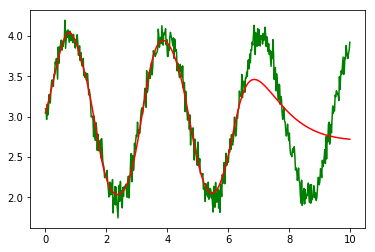

mae = 0.2348006582760564
mse = 0.127153849058179


In [81]:
# print result

plt.plot(x_vals,y_vals, 'green')
plt.plot(x_vals,resSigmoid, 'red')
plt.show()

print( "mae = " + str(mae(resSigmoid,y_vals)))
print( "mse = " + str(mse(resSigmoid,y_vals)))

### Section 2.4: Tanh

In [82]:
# model with tanh

# first layer
A1 = tf.Variable(np.random.rand(1,8), dtype=tf.float64)
b1 = tf.Variable(np.random.rand(8), dtype=tf.float64)
l1_out = tf.nn.tanh(tf.matmul(x, A1) + b1)

# second layer
A2 = tf.Variable(np.random.rand(8,8), dtype=tf.float64)
b2 = tf.Variable(np.random.rand(8), dtype=tf.float64)
l2_out = tf.nn.tanh(tf.matmul(l1_out, A2) + b2)

# third layer
A3 = tf.Variable(np.random.rand(8,1), dtype=tf.float64)
b3 = tf.Variable(np.random.rand(1), dtype=tf.float64)
l3_out = tf.matmul(l2_out, A3) + b3

# output layer
y_pred = l3_out

# loss function
loglikelihoods = tf.square(y_pred - y)
avg_llh = tf.reduce_mean(loglikelihoods)

# optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.01)
modelTanh = opt.minimize(avg_llh)

In [83]:
# train model
resTanh = testFunctionActivation(10,x_vals,y_vals,modelTanh)

Loss =  0.938924007155105
Loss =  0.47150560615432696
Loss =  0.3530132981379351
Loss =  0.2872471502154665
Loss =  0.2843976299496581
Loss =  0.2635576119291734
Loss =  0.2830460748320007
Loss =  0.15328470757342383
Loss =  0.17904315624973402
Loss =  0.12260028914108526
Loss =  0.0723032775503448
Loss =  0.041331334949133824
Loss =  0.08599941966479804
Loss =  0.09095477245349651
Loss =  0.08560430412475183
Loss =  0.0723312528348901
Loss =  0.09941250016581639
Loss =  0.07677741084065763
Loss =  0.08873318847560586
Loss =  0.08144181072944345
Loss =  0.06539206423195383
Loss =  0.13586296203340534
Loss =  0.11134808145244367
Loss =  0.06105414605345725
Loss =  0.057867969347101166
Loss =  0.06358135252943105
Loss =  0.09228488137806537
Loss =  0.07882048580820054
Loss =  0.05338082559987782
Loss =  0.06671873827267406
Loss =  0.08458172058797704
Loss =  0.10163879868021543
Loss =  0.10267470926793255
Loss =  0.09071261205108712
Loss =  0.06424128733109823
Loss =  0.09580830710863465

Loss =  0.012306209335525809
Loss =  0.010469830244320326
Loss =  0.01099573941623849
Loss =  0.010439235062781138
Loss =  0.009765652401900953
Loss =  0.011784687567938245
Loss =  0.012734874001458403
Loss =  0.014708012138505198
Loss =  0.010295113042138659
Loss =  0.010795720259674995
Loss =  0.7050490336071804
Loss =  0.41751989021565306
Loss =  0.36056310475055303
Loss =  0.3010779004090465
Loss =  0.26195788603909514
Loss =  0.17958465116896832
Loss =  0.13359723179556882
Loss =  0.09134729398670814
Loss =  0.0939348207560484
Loss =  0.05201976639209413
Loss =  0.026080850525118306
Loss =  0.01158383200065026
Loss =  0.011687538308720397
Loss =  0.01140851385262438
Loss =  0.013863286047012167
Loss =  0.01202226421262786
Loss =  0.010510590039246162
Loss =  0.00824322028795435
Loss =  0.010121038898924883
Loss =  0.008988995983167885
Loss =  0.010639596569107037
Loss =  0.012706196581692655
Loss =  0.010230339827550127
Loss =  0.010490754682903312
Loss =  0.009548945886922133
Los

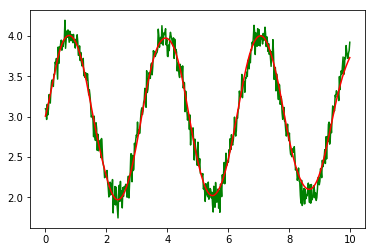

mae = 0.08302727730101565
mse = 0.010767899955305813


In [84]:
# print result

plt.plot(x_vals,y_vals, 'green')
plt.plot(x_vals,resTanh, 'red')
plt.show()

print( "mae = " + str(mae(resTanh,y_vals)))
print( "mse = " + str(mse(resTanh,y_vals)))

### Section 2.4: Identité

In [86]:
# model without activation

# first layer
A1 = tf.Variable(np.random.rand(1,8), dtype=tf.float64)
b1 = tf.Variable(np.random.rand(8), dtype=tf.float64)
l1_out = tf.matmul(x, A1) + b1

# second layer
A2 = tf.Variable(np.random.rand(8,8), dtype=tf.float64)
b2 = tf.Variable(np.random.rand(8), dtype=tf.float64)
l2_out = tf.matmul(l1_out, A2) + b2

# third layer
A3 = tf.Variable(np.random.rand(8,1), dtype=tf.float64)
b3 = tf.Variable(np.random.rand(1), dtype=tf.float64)
l3_out = tf.matmul(l2_out, A3) + b3

# output layer
y_pred = l3_out

# loss function
loglikelihoods = tf.square(y_pred - y)
avg_llh = tf.reduce_mean(loglikelihoods)

# optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.01)
modelId = opt.minimize(avg_llh)

In [87]:
# train model
resId = testFunctionActivation(10,x_vals,y_vals,modelId)

Loss =  3161.171809965194
Loss =  1.1379578719664163
Loss =  0.9205157359529733
Loss =  0.6430237502106609
Loss =  0.43001903657862883
Loss =  0.45239439690772437
Loss =  0.486310012437359
Loss =  0.4460286502354496
Loss =  0.5341401950672968
Loss =  0.4803487169824625
Loss =  0.5145960189243869
Loss =  0.45140165187793685
Loss =  0.551812810319069
Loss =  0.5210821446928438
Loss =  0.5279166350627293
Loss =  0.5246926489522682
Loss =  0.49136102085754874
Loss =  0.5758673036894154
Loss =  0.46402534328202494
Loss =  0.4683687093980189
Loss =  0.4923399820922279
Loss =  0.4546632318843716
Loss =  0.4862795793212864
Loss =  0.47177259930476095
Loss =  0.4903364542739236
Loss =  0.45671174198717246
Loss =  0.5308654425665333
Loss =  0.5030424116265659
Loss =  0.47707013649730656
Loss =  0.4739196388295308
Loss =  0.47696210537032285
Loss =  0.46933468307819576
Loss =  0.49617644382384263
Loss =  0.4796337465730124
Loss =  0.5532709909004919
Loss =  0.43580240451492974
Loss =  0.559964631

Loss =  0.7825941691872056
Loss =  0.6560527201223529
Loss =  0.520427921300596
Loss =  0.5377456130399004
Loss =  0.5122178243033642
Loss =  0.4695542034485529
Loss =  0.5482135055167495
Loss =  0.5354942560317923
Loss =  0.521507909372859
Loss =  0.5388911669445001
Loss =  0.4652302067579954
Loss =  0.46248524146264686
Loss =  0.4815111915500171
Loss =  0.403039119464643
Loss =  0.5086111815513603
Loss =  0.43619229805124005
Loss =  0.5196355259568098
Loss =  0.47352060447038796
Loss =  0.5116497373408684
Loss =  0.5210984046563835
Loss =  0.48755193167111366
Loss =  0.4911079033995027
Loss =  0.4414892799381252
Loss =  0.5263909238749224
Loss =  0.507077401519851
Loss =  0.4398921689635428
Loss =  0.4284459497947259
Loss =  0.517153773934958
Loss =  0.4907227423813638
Loss =  0.5083270224825768
Loss =  0.45803185455850537
Loss =  0.40534658747845315
Loss =  0.525997079668684
Loss =  0.48211585822229225
Loss =  0.5420359677855241
Loss =  0.5015574025372715
Loss =  0.44369326880844556

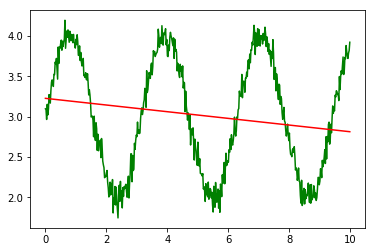

mae = 0.6170381744590977
mse = 0.4863563376261136


In [88]:
# print result

plt.plot(x_vals,y_vals, 'green')
plt.plot(x_vals,resId, 'red')
plt.show()

print( "mae = " + str(mae(resId,y_vals)))
print( "mse = " + str(mse(resId,y_vals)))